# Histogram / Density plot of nr of trees per ensemble

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from arboreto.core import *

In [2]:
XGB_KWARGS

{'colsample_bylevel': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_jobs': 1}

In [4]:
meta_df = pd.read_csv('/home/tmo/work/kuleuven/papers/arboreto/meta_out_macosko_40k.tsv', sep='\t')

In [6]:
meta_df.head()

,n_estimators,target
0,330,KITL
1,185,TMTC3
2,580,CEP290
3,251,4930430F08RIK
4,108,1700017N19RIK


In [24]:
df = macosko_df

all_zeros = df.loc[:, (df == 0).all()]

In [27]:
set(all_zeros.columns)

{'0610025J13RIK',
 '4930405D11RIK',
 '4930441J16RIK',
 '4930455D15RIK',
 'ADH6-PS1',
 'CPB1',
 'CYP2J7-PS',
 'DCDC2C',
 'GM14064',
 'GM17160',
 'GM20458',
 'GM24768',
 'GM24893',
 'GPR171',
 'MORC1',
 'N-R5S80',
 'PADI3',
 'SLC25A54',
 'SPZ1'}

In [16]:
macosko_df = pd.read_csv('/media/tmo/data/work/datasets/macosko/in/macosko_40k.tsv.gz', sep='\t')

* the targets with 5000 estimators are the all-zero columns! 
* these targets should have been filtered out before proceeding the analysis

In [41]:
clean_df = meta_df[meta_df['n_estimators'] < 2000]

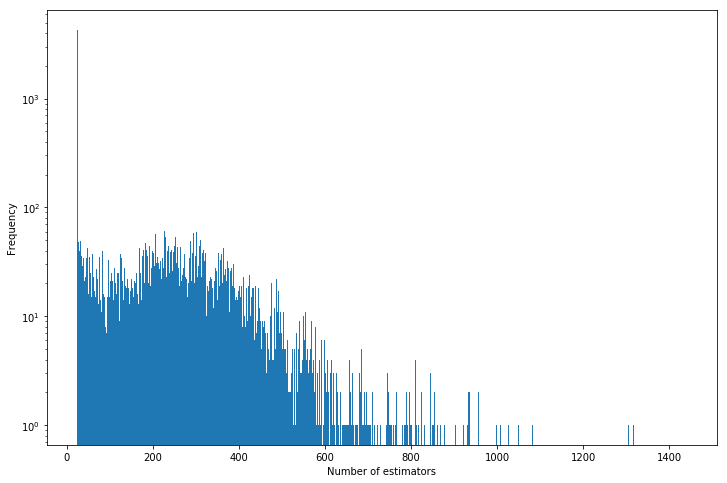

In [49]:
fig, ax = plt.subplots()
clean_df.n_estimators.plot.hist(bins=1000, ax=ax, figsize=(12,8))
ax.set_yscale('log')
ax.set_xlabel('Number of estimators')
plt.show()

In [83]:
len(clean_df.n_estimators)

12934

In [84]:
clean_df.n_estimators.sum() / (len(clean_df.n_estimators) * 1000)

0.18299953610638628

In [ ]:
clean_df

In [69]:
nonzero_df = pd.DataFrame(macosko_df.astype(bool).sum(axis=0)).reset_index()
nonzero_df.columns = ['target', 'n_nonzero']
nonzero_df

,target,n_nonzero
0,KITL,370
1,TMTC3,1735
2,CEP290,13308
3,4930430F08RIK,1964
4,1700017N19RIK,33
5,RASSF9,63
6,LRRIQ1,39
7,ADGB,34
8,SLC6A15,1104
9,TMTC2,1484


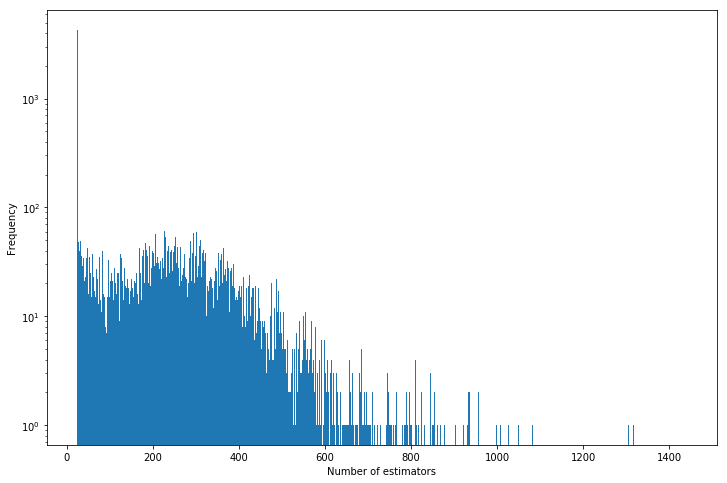

In [49]:
fig, ax = plt.subplots()
clean_df.n_estimators.plot.hist(bins=1000, ax=ax, figsize=(12,8))
ax.set_yscale('log')
ax.set_xlabel('Number of estimators')
plt.show()

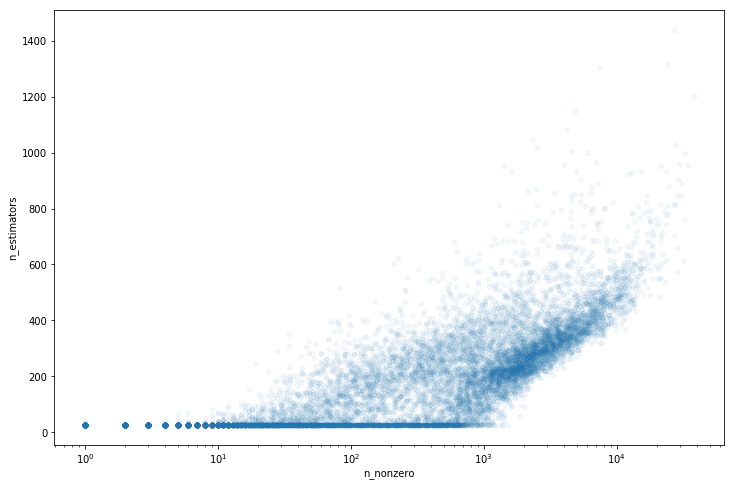

In [90]:
fig, ax = plt.subplots()
nonzero_df.merge(clean_df[['target', 'n_estimators']]).plot.scatter(ax=ax, x='n_nonzero', y='n_estimators', figsize=(12,8), alpha=.05)

ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

In [ ]:
nonzero_df